# Sklearn and Visualization


This work focuses on using the basics learnt so far on Numpy, Pandas, Matplotlib, Seaborn and creating predictive models using sklearn. 


## Importing relevant libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

## Loading Data

In [13]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-dec-2020.csv')

In [14]:
df_2021 = pd.read_csv('resale-flat-prices-based-on-registration-date-2021.csv')

In [15]:
df_2022 = pd.read_csv('resale-flat-prices-based-on-registration-date-2022.csv')

**1st dataframe df**

In [16]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [17]:
print(df.shape)
df.describe()

(87589, 11)


,floor_area_sqm,lease_commence_date,resale_price
count,87589.000000,87589.000000,8.758900e+04
mean,97.719819,1994.320908,4.425058e+05
std,24.273804,12.986790,1.540691e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1995.000000,4.100000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


In [18]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [19]:
df.rename(columns = {'month':'yyyy-mm'}, inplace = True)

In [ ]:
df.columns
df.head()

,yyyy-mm,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


**2nd dataframe df_2021** 

In [ ]:
df_2021.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
1,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
2,2021-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,59 years,260000.0
3,2021-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,58 years 02 months,265000.0
4,2021-01,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,58 years 01 month,265000.0


In [20]:
print(df_2021.shape)
df_2021.describe()

(29087, 11)


,floor_area_sqm,lease_commence_date,resale_price
count,29087.000000,29087.000000,2.908700e+04
mean,98.238216,1997.329116,5.113812e+05
std,23.672240,14.445958,1.626193e+05
min,31.000000,1966.000000,1.800000e+05
25%,84.000000,1985.000000,3.990000e+05
50%,93.000000,1998.000000,4.830000e+05
75%,113.000000,2013.000000,6.000000e+05
max,243.000000,2019.000000,1.360000e+06


In [ ]:
df_2021.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [21]:
df_2021.rename(columns = {'month':'yyyy-mm'}, inplace = True)

In [22]:
df_2021.columns
df_2021.head()

,yyyy-mm,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
1,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
2,2021-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,59 years,260000.0
3,2021-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,58 years 02 months,265000.0
4,2021-01,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,58 years 01 month,265000.0


 *3rd dataframe df_2022*

In [23]:
df_2022.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2022-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1977,54 years 05 months,245000.0
1,2022-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,54 years 05 months,358000.0
2,2022-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,55 years 01 month,355000.0
3,2022-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,58 years,338000.0
4,2022-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,82.0,New Generation,1980,57 years 02 months,420000.0


In [24]:
print(df_2022.shape)
df_2022.describe()

(26740, 11)


,floor_area_sqm,lease_commence_date,resale_price
count,26740.000000,26740.000000,2.674000e+04
mean,96.880266,1997.218287,5.496646e+05
std,23.859922,14.667795,1.703544e+05
min,31.000000,1967.000000,2.000000e+05
25%,82.000000,1985.000000,4.300000e+05
50%,93.000000,1997.000000,5.250000e+05
75%,112.000000,2013.000000,6.400000e+05
max,199.000000,2019.000000,1.418000e+06


In [25]:
df_2022.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [26]:
df_2022.rename(columns = {'month':'yyyy-mm'}, inplace = True)

In [27]:
df_2022.columns
df_2022.head()

,yyyy-mm,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2022-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1977,54 years 05 months,245000.0
1,2022-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,54 years 05 months,358000.0
2,2022-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,55 years 01 month,355000.0
3,2022-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,58 years,338000.0
4,2022-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,82.0,New Generation,1980,57 years 02 months,420000.0


### Data Formatting
Goals for all 3 dataframes:
* Create 2 variables - one called `year` and another called `month` and derive its values from the existing `yyyy-mm` column, using the `apply()` function. 
* Extract the number of years remaining on lease from the `remaining_lease` column using `apply()` and name this column `remaining_lease_years` 
* Drop the columns `yyyy-mm`, `block`, `street_name`, `lease_commence_date` and `remaining_lease` from the dataframe using the `drop()` function. 
* Ensure the new columns are of type `int`. 


**1st dataframe df**

In [28]:
df[['year', 'month']] = df["yyyy-mm"].apply(lambda x: pd.Series(str(x).split("-")))

In [29]:
df['remaining_lease_years'] = df['remaining_lease'].apply(lambda x: x.split(' ')[0])

In [30]:
df.drop(columns=['yyyy-mm', 'street_name', 'lease_commence_date', 'remaining_lease'])

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,resale_price,year,month,remaining_lease_years
0,ANG MO KIO,2 ROOM,406,10 TO 12,44.0,Improved,232000.0,2017,01,61
1,ANG MO KIO,3 ROOM,108,01 TO 03,67.0,New Generation,250000.0,2017,01,60
2,ANG MO KIO,3 ROOM,602,01 TO 03,67.0,New Generation,262000.0,2017,01,62
3,ANG MO KIO,3 ROOM,465,04 TO 06,68.0,New Generation,265000.0,2017,01,62
4,ANG MO KIO,3 ROOM,601,01 TO 03,67.0,New Generation,265000.0,2017,01,62
...,...,...,...,...,...,...,...,...,...,...
87584,YISHUN,EXECUTIVE,352,04 TO 06,146.0,Maisonette,560000.0,2020,12,66
87585,YISHUN,EXECUTIVE,356,01 TO 03,145.0,Apartment,540000.0,2020,12,66
87586,YISHUN,EXECUTIVE,611,13 TO 15,142.0,Apartment,638000.0,2020,12,66
87587,YISHUN,EXECUTIVE,834,10 TO 12,146.0,Maisonette,683500.0,2020,12,66


In [31]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['remaining_lease_years'] = df['remaining_lease_years'].astype(int)

In [32]:
df.dtypes

yyyy-mm                   object
town                      object
flat_type                 object
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
remaining_lease           object
resale_price             float64
year                       int64
month                      int64
remaining_lease_years      int64
dtype: object

**2nd dataframe df_2021**

In [33]:
df_2021[['year', 'month']] = df["yyyy-mm"].apply(lambda x: pd.Series(str(x).split("-")))

In [34]:
df_2021['remaining_lease_years'] = df_2021['remaining_lease'].apply(lambda x: x.split(' ')[0])

In [35]:
df_2021.drop(columns=['yyyy-mm', 'street_name', 'lease_commence_date', 'remaining_lease'])

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,resale_price,year,month,remaining_lease_years
0,ANG MO KIO,2 ROOM,170,01 TO 03,45.0,Improved,211000.0,2017,01,64
1,ANG MO KIO,2 ROOM,170,07 TO 09,45.0,Improved,225000.0,2017,01,64
2,ANG MO KIO,3 ROOM,331,04 TO 06,68.0,New Generation,260000.0,2017,01,59
3,ANG MO KIO,3 ROOM,534,04 TO 06,68.0,New Generation,265000.0,2017,01,58
4,ANG MO KIO,3 ROOM,561,01 TO 03,68.0,New Generation,265000.0,2017,01,58
...,...,...,...,...,...,...,...,...,...,...
29082,YISHUN,5 ROOM,502B,13 TO 15,112.0,Improved,720000.0,2018,06,95
29083,YISHUN,EXECUTIVE,877,01 TO 03,142.0,Apartment,738000.0,2018,06,65
29084,YISHUN,EXECUTIVE,824,04 TO 06,146.0,Maisonette,755000.0,2018,06,65
29085,YISHUN,5 ROOM,348A,10 TO 12,112.0,DBSS,848000.0,2018,06,90


In [36]:
df_2021['year'] = df_2021['year'].astype(int)
df_2021['month'] = df_2021['month'].astype(int)
df_2021['remaining_lease_years'] = df_2021['remaining_lease_years'].astype(int)

In [37]:
df_2021.dtypes

yyyy-mm                   object
town                      object
flat_type                 object
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
remaining_lease           object
resale_price             float64
year                       int64
month                      int64
remaining_lease_years      int64
dtype: object

**3rd dataframe df_2022**

In [38]:
df_2022[['year', 'month']] = df_2022["yyyy-mm"].apply(lambda x: pd.Series(str(x).split("-")))

In [39]:
df_2022['remaining_lease_years'] = df_2022['remaining_lease'].apply(lambda x: x.split(' ')[0])

In [40]:
df_2022.drop(columns=['yyyy-mm', 'street_name', 'lease_commence_date', 'remaining_lease'])

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,resale_price,year,month,remaining_lease_years
0,ANG MO KIO,2 ROOM,323,07 TO 09,44.0,Improved,245000.0,2022,01,54
1,ANG MO KIO,3 ROOM,320,07 TO 09,73.0,New Generation,358000.0,2022,01,54
2,ANG MO KIO,3 ROOM,225,07 TO 09,67.0,New Generation,355000.0,2022,01,55
3,ANG MO KIO,3 ROOM,331,07 TO 09,68.0,New Generation,338000.0,2022,01,58
4,ANG MO KIO,3 ROOM,534,07 TO 09,82.0,New Generation,420000.0,2022,01,57
...,...,...,...,...,...,...,...,...,...,...
26735,YISHUN,EXECUTIVE,355,07 TO 09,146.0,Maisonette,845000.0,2022,12,65
26736,YISHUN,EXECUTIVE,643,07 TO 09,142.0,Apartment,782000.0,2022,12,63
26737,YISHUN,EXECUTIVE,643,07 TO 09,142.0,Apartment,770888.0,2022,12,63
26738,YISHUN,EXECUTIVE,606,10 TO 12,146.0,Maisonette,788000.0,2022,12,64


In [41]:
df_2022['year'] = df_2022['year'].astype(int)
df_2022['month'] = df_2022['month'].astype(int)
df_2022['remaining_lease_years'] = df_2022['remaining_lease_years'].astype(int)

In [42]:
df_2022.dtypes

yyyy-mm                   object
town                      object
flat_type                 object
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
remaining_lease           object
resale_price             float64
year                       int64
month                      int64
remaining_lease_years      int64
dtype: object


 Knowing if the apartment is on a specific storey can help determine the resale price. Goals for all 3 dataframes:
 * Use the column `storey_range` and use the following set of rules to assign a category for each range. Create a new column in the dataframe `storey_category` to store the values obtained, using the `apply()` function. 

|Storey start(inclusive)|Storey end(inclusive)|Storey category|
|------------|----------|---------------|
|1|9|0|
|10|21|1|
|22|30|2|
|31|39|3|
|40|51|4|
|-|-|None|


In [ ]:
#df.storey_range

In [ ]:
#[['Storey start(inclusive)', 'TO' ,'Storey end(inclusive)']] = df["storey_range"].apply(lambda x: pd.Series(str(x).split(" ")))

In [ ]:
#df.columns

In [ ]:
#df.dtypes

In [ ]:
#df['Storey start(inclusive)'] = df['Storey start(inclusive)'].astype(int)
#df['Storey end(inclusive)'] = df['Storey end(inclusive)'].astype(int)

In [ ]:
#df.dtypes

In [43]:
def condition (i):

              if int(i[0:2]) >=1 and int(i[-2:]) <=10: return 0 
              elif int(i[0:2]) >=10 and int(i[-2:]) <=21: return 1 
              elif int(i[0:2]) >=22 and int(i[-2:]) <=30: return 2 
              elif int(i[0:2]) >=31 and int(i[-2:]) <=39: return 3 
              elif int(i[0:2]) >=40 and int(i[-2:]) <=51: return 4 
              else: return None
              

In [44]:
df_storey_range20 = df['storey_range'].apply(condition)
df['storey_category'] = df_storey_range20

In [45]:
df.drop(columns=['storey_range'])

,yyyy-mm,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,remaining_lease_years,storey_category
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,61,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,60,0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,62,0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,62,0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87584,2020-12,YISHUN,EXECUTIVE,352,YISHUN RING RD,146.0,Maisonette,1988,66 years 08 months,560000.0,2020,12,66,0
87585,2020-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,145.0,Apartment,1988,66 years 09 months,540000.0,2020,12,66,0
87586,2020-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,142.0,Apartment,1987,66 years,638000.0,2020,12,66,1
87587,2020-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,146.0,Maisonette,1988,66 years 02 months,683500.0,2020,12,66,1


In [46]:
df.isna().sum()

yyyy-mm                  0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
remaining_lease          0
resale_price             0
year                     0
month                    0
remaining_lease_years    0
storey_category          0
dtype: int64

In [47]:
df_storey_range21 = df_2021['storey_range'].apply(condition)
df_2021['storey_category'] = df_storey_range21

In [48]:
df_2021.drop(columns=['storey_range'])

,yyyy-mm,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,remaining_lease_years,storey_category
0,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,45.0,Improved,1986,64 years 01 month,211000.0,2017,1,64,0
1,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,45.0,Improved,1986,64 years 01 month,225000.0,2017,1,64,0
2,2021-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,68.0,New Generation,1981,59 years,260000.0,2017,1,59,0
3,2021-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,68.0,New Generation,1980,58 years 02 months,265000.0,2017,1,58,0
4,2021-01,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,68.0,New Generation,1980,58 years 01 month,265000.0,2017,1,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29082,2021-12,YISHUN,5 ROOM,502B,YISHUN ST 51,112.0,Improved,2018,95 years 01 month,720000.0,2018,6,95,1
29083,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,142.0,Apartment,1987,65 years 01 month,738000.0,2018,6,65,0
29084,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,146.0,Maisonette,1987,65 years,755000.0,2018,6,65,0
29085,2021-12,YISHUN,5 ROOM,348A,YISHUN AVE 11,112.0,DBSS,2013,90 years 11 months,848000.0,2018,6,90,1


In [49]:
df_2021.isna().sum()

yyyy-mm                  0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
remaining_lease          0
resale_price             0
year                     0
month                    0
remaining_lease_years    0
storey_category          0
dtype: int64

In [50]:
df_storey_range22 = df_2022['storey_range'].apply(condition)
df_2022['storey_category'] = df_storey_range22

In [51]:
df_2022.drop(columns=['storey_range'])

,yyyy-mm,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,remaining_lease_years,storey_category
0,2022-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,54 years 05 months,245000.0,2022,1,54,0
1,2022-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,73.0,New Generation,1977,54 years 05 months,358000.0,2022,1,54,0
2,2022-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,67.0,New Generation,1978,55 years 01 month,355000.0,2022,1,55,0
3,2022-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,68.0,New Generation,1981,58 years,338000.0,2022,1,58,0
4,2022-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,82.0,New Generation,1980,57 years 02 months,420000.0,2022,1,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,2022-12,YISHUN,EXECUTIVE,355,YISHUN RING RD,146.0,Maisonette,1988,65 years,845000.0,2022,12,65,0
26736,2022-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,142.0,Apartment,1987,63 years 10 months,782000.0,2022,12,63,0
26737,2022-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,142.0,Apartment,1987,63 years 10 months,770888.0,2022,12,63,0
26738,2022-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,146.0,Maisonette,1987,64 years,788000.0,2022,12,64,1


In [52]:
df_2022.isna().sum()

yyyy-mm                  0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
remaining_lease          0
resale_price             0
year                     0
month                    0
remaining_lease_years    0
storey_category          0
dtype: int64

### Visualization

In [ ]:
df.resale_price 

0        232000.0
1        250000.0
2        262000.0
3        265000.0
4        265000.0
           ...   
87584    560000.0
87585    540000.0
87586    638000.0
87587    683500.0
87588    670000.0
Name: resale_price, Length: 87589, dtype: float64

In [ ]:
df.floor_area_sqm

0         44.0
1         67.0
2         67.0
3         68.0
4         67.0
         ...  
87584    146.0
87585    145.0
87586    142.0
87587    146.0
87588    142.0
Name: floor_area_sqm, Length: 87589, dtype: float64

In [ ]:
#df['maximum_average_resale_price'] = df['resale_price'] / df['floor_area_sqm']

In [53]:
df_2020 = df[df['year'] == 2020]
price_2020 = df_2020.groupby( 'town', sort=False).mean()
price_2020.reset_index(inplace=True)
price_2020

,town,floor_area_sqm,lease_commence_date,resale_price,year,month,remaining_lease_years,storey_category
0,ANG MO KIO,86.187563,1984.552658,406624.817452,2020.0,7.056169,63.010030,0.370110
1,BEDOK,88.770342,1985.623574,411303.064639,2020.0,7.212928,64.120152,0.344487
2,BISHAN,108.395089,1989.703125,625950.486607,2020.0,7.602679,68.194196,0.319196
3,BUKIT BATOK,101.021866,1988.682216,403083.915452,2020.0,6.911079,67.259475,0.313411
4,BUKIT MERAH,87.176101,1990.305660,562575.350943,2020.0,7.355975,68.734591,0.628931
5,BUKIT PANJANG,99.386702,2005.220472,437939.671916,2020.0,6.994751,83.976378,0.552931
6,BUKIT TIMAH,108.553191,1983.489362,698358.170213,2020.0,7.446809,61.978723,0.382979
7,CENTRAL AREA,81.458824,1989.170588,600480.611765,2020.0,7.494118,67.488235,1.011765
8,CHOA CHU KANG,108.790870,2001.149682,410019.381104,2020.0,7.061571,79.597665,0.358811
9,CLEMENTI,85.562607,1990.025729,494006.253859,2020.0,7.451115,68.663808,0.632933


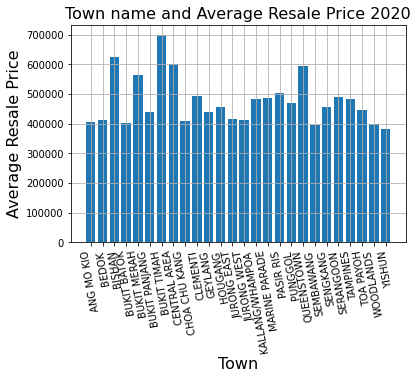

In [54]:
plt.bar(price_2020['town'], price_2020['resale_price'])
plt.title('Town name and Average Resale Price 2020', fontsize=16)
plt.xlabel('Town', fontsize=16)
plt.ylabel('Average Resale Price', fontsize=16)
plt.xticks(rotation = 100)
plt.grid(True)
plt.show()

In [55]:
price_2021 = df_2021.groupby("town", sort=False).mean()
price_2021.reset_index(inplace=True)
price_2021


,town,floor_area_sqm,lease_commence_date,resale_price,year,month,remaining_lease_years,storey_category
0,ANG MO KIO,86.383886,1983.618957,442650.056872,2017.000000,1.000000,61.118483,0.373460
1,BEDOK,92.528465,1987.188119,473316.954827,2017.000000,2.167698,64.772896,0.369431
2,BISHAN,109.612281,1989.664912,671889.347368,2017.000000,3.000000,67.259649,0.389474
3,BUKIT BATOK,97.813830,1990.896277,459557.446809,2017.000000,3.000000,68.514628,0.368351
4,BUKIT MERAH,88.092924,1992.208014,609753.198636,2017.000000,3.846547,69.698210,0.674339
5,BUKIT PANJANG,101.925118,2002.320379,491944.486142,2017.000000,4.198104,80.079621,0.554502
6,BUKIT TIMAH,111.024390,1983.365854,737160.829268,2017.000000,5.000000,61.036585,0.243902
7,CENTRAL AREA,85.352490,1994.329502,725841.455939,2017.000000,5.000000,71.659004,1.310345
8,CHOA CHU KANG,105.480892,2005.617197,483240.298847,2017.000000,5.090446,83.149045,0.430573
9,CLEMENTI,87.348214,1992.254464,555685.150298,2017.000000,6.000000,69.979167,0.763393


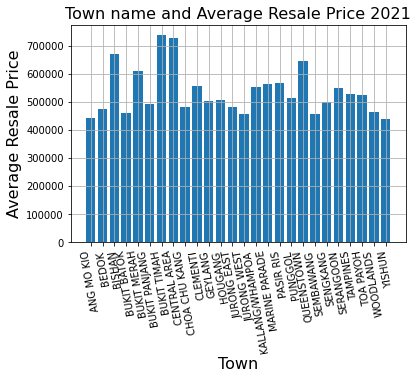

In [56]:
plt.bar(price_2021['town'], price_2021['resale_price'])
plt.title('Town name and Average Resale Price 2021', fontsize=16)
plt.xlabel('Town', fontsize=16)
plt.ylabel('Average Resale Price', fontsize=16)
plt.xticks(rotation = 100)
plt.grid(True)
plt.show()

In [57]:
price_2022 = df_2022.groupby("town", sort=False).mean()
price_2022.reset_index(inplace=True)
price_2022

,town,floor_area_sqm,lease_commence_date,resale_price,year,month,remaining_lease_years,storey_category
0,ANG MO KIO,85.079922,1987.340156,514777.640234,2022.0,6.454191,63.799220,0.459064
1,BEDOK,90.157279,1985.384784,492585.793709,2022.0,6.396489,61.960497,0.336503
2,BISHAN,107.306867,1988.967811,725987.490901,2022.0,6.300429,65.581545,0.379828
3,BUKIT BATOK,96.571106,1994.664786,529230.386005,2022.0,6.634312,71.222348,0.495485
4,BUKIT MERAH,87.808930,1991.784008,639135.228453,2022.0,6.257529,68.355140,0.644860
5,BUKIT PANJANG,101.465409,2000.488470,522628.474633,2022.0,6.366876,77.243187,0.530398
6,BUKIT TIMAH,103.645161,1981.629032,740163.385161,2022.0,6.645161,58.080645,0.306452
7,CENTRAL AREA,81.507042,1989.953052,695712.440188,2022.0,6.408451,66.370892,1.014085
8,CHOA CHU KANG,106.665242,2003.816952,527691.492165,2022.0,6.272792,80.388177,0.393875
9,CLEMENTI,86.470492,1992.275410,579829.875410,2022.0,6.054098,69.045902,0.704918


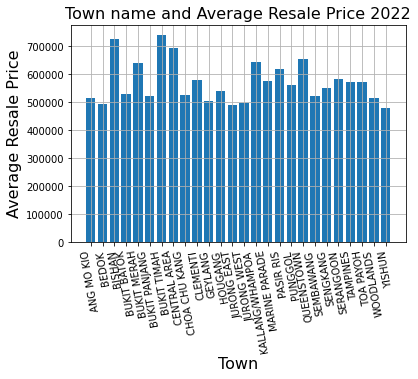

In [58]:
plt.bar(price_2022['town'], price_2022['resale_price'])
plt.title('Town name and Average Resale Price 2022', fontsize=16)
plt.xlabel('Town', fontsize=16)
plt.ylabel('Average Resale Price', fontsize=16)
plt.xticks(rotation = 100)
plt.grid(True)
plt.show()

### Train test split

`df` will be the train data, and `df_2021` the validation data. The `year` 
and `month` features are no longer used. So we shall drop them as well.

In [59]:
df.drop(["year", "month"], axis = 1, inplace=True)
df_2021.drop(["year", "month"], axis = 1, inplace=True)
df_2022.drop(["year", "month"], axis = 1, inplace=True)

In [60]:
X_train = df.drop(["resale_price"], axis = 1)
y_train = df["resale_price"]
X_train.shape, y_train.shape

((87589, 12), (87589,))

In [61]:
X_val = df_2021.drop(["resale_price"], axis = 1)
y_val = df_2021["resale_price"]
X_val.shape, y_val.shape

((29087, 12), (29087,))

In [62]:
X_test = df_2022.drop(["resale_price"], axis = 1)
y_test = df_2022["resale_price"]
X_test.shape, y_test.shape

((26740, 12), (26740,))

### Data Preprocessing

**Part A:**

* Separate out the categorical columns in the train dataset as `cat_cols` and numeric ones as `num_cols` 
* Perform standard scaling on the numeric columns and one hot encoding on the categorical columns of the train dataset. Use a Column Transformer to achieve this. 


In [63]:
num_cols = X_train.select_dtypes(exclude = 'object').columns
cat_cols = X_train.select_dtypes(include = 'object').columns

In [64]:
enc = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()

In [65]:
cf = ColumnTransformer(
    transformers = [
        ('num',scaler, num_cols),
        ('cat',enc,cat_cols)],
)

In [66]:
X_train.shape

(87589, 12)

In [67]:
transformer = cf.fit_transform(X_train, y_train)
transformer.shape

(87589, 3776)

**Part B:**

* Build a pipeline `processing_pipeline` that performs the column transformation processing and further selects the **best 15 features** using `SelectKBest` 


In [68]:
from sklearn.feature_selection import SelectKBest

In [69]:
processing_pipeline = Pipeline([('columntransformer',cf),('featsel',SelectKBest(k=15))])
processing_pipeline.fit_transform(X_train,y_train).shape

(87589, 15)

In [70]:
processing_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years',
       'storey_category'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['yyyy-mm', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object'))])),
                ('featsel', SelectKBest(k=15))])

### Regression

**Part A:**
* Create a new pipeline that uses the `processing_pipeline` defined above and adds a standard Linear Regressor to the pipeline. 
* Fit the model on the train dataset. 
* Obtain the predictions on the validation set
* Report $R^{2}$ and mean squared error metrics on train and validation sets.


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
new_pipeline = Pipeline(steps = [
  ('processing_pipeline',processing_pipeline),
  ('linear',LinearRegression())                                 
])

In [73]:
new_pipeline.fit(X_train, y_train)

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   StandardScaler(),
                                                                   Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years',
       'storey_category'],
      dtype='object')),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   Index(['yyyy-mm', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object'))])),
                                 ('featsel', SelectKBest(k=15))])),
                ('linear', LinearRegression())])

In [74]:
y_fit = new_pipeline.predict(X_train)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

print('r-squared on train set:',r2_score(y_train,y_fit))
print('mean squared error on train set:',mean_squared_error(y_train,y_fit))

r-squared on train set: 0.4202000225574273
mean squared error on train set: 13762712816.429588


In [76]:
Y_pred = new_pipeline.predict(X_val)

In [77]:
print('r-squared on validation set:',r2_score(y_val,Y_pred))
print('mean squared error on validation set:',mean_squared_error(y_val,Y_pred))

r-squared on validation set: 0.27410942743034417
mean squared error on validation set: 19195532036.62947


**Part B:**
* Fit a RandomForest regression model on the entire processed X_train, without the `SelectKBest` feature selection. Create another pipeline object to achieve this. 
* Report the $R^{2}$ and mean squared error metrics on train and validation sets. 


In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf= RandomForestRegressor()
new_pipeline3 = Pipeline(steps=[('columntransformer',cf),('randomforestregressor',rf)])
new_pipeline3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years',
       'storey_category'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['yyyy-mm', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [80]:
y_fit = new_pipeline3.predict(X_train)
Y_pred = new_pipeline3.predict(X_val)

In [81]:
print('R-squared on train set:', r2_score(y_train,y_fit))
print('MSE on train set:', mean_squared_error(y_train, y_fit))

R-squared on train set: 0.9956950895054613
MSE on train set: 102185665.99140468


In [82]:

print('R-squared on validation set:',r2_score(y_val,Y_pred))
print('MSE on validation set:',mean_squared_error(y_val,Y_pred))

R-squared on validation set: 0.8695527215103472
MSE on validation set: 3449562520.8012667


**Part C:**
* Fit a Support vector regressor on the processed X_train, without `SelectKBest`. Create another pipeline object to achieve this. 
* Report $R^{2}$ and MSE on train and validation sets 


In [83]:
from sklearn.svm import SVR

In [84]:
svr = SVR()
new_pipeline4 = Pipeline(steps=[('coltfr', cf),('svr',svr)])
new_pipeline4.fit(X_train,y_train)

Pipeline(steps=[('coltfr',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years',
       'storey_category'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['yyyy-mm', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object'))])),
                ('svr', SVR())])

In [ ]:
y_fit = new_pipeline4.predict(X_train)
Y_pred = new_pipeline4.predict(X_val)

In [363]:
print('R-squared on train set:',r2_score(y_train,y_fit))
print('MSE on train set:',mean_squared_error(y_train,y_fit))

R-squared on train set: -0.021158550208694615
MSE on train set: 24239241830.52569


In [364]:

print('R-squared on validation set:',r2_score(y_val,Y_pred))
print('MSE on validation set:',mean_squared_error(y_val,Y_pred))

R-squared on validation set: -0.35668285055904536
MSE on validation set: 35876274063.268616


### Classification

To frame a classification task for this dataset, let us convert the resale prices into a categorical value using the following rules:
* if resale_price <= 50th percentile of resale prices before 2021, set range to 0 (i.e. low)
* else set range to 1 (i.e. High)

In [365]:
y_train_cat = (y_train > y_train.describe()["50%"]).astype(int)
y_train_cat.value_counts()

0    43802
1    43787
Name: resale_price, dtype: int64

In [366]:
y_val_cat = (y_val > y_train.describe()["50%"]).astype(int)
y_val_cat.value_counts()

1    20824
0     8263
Name: resale_price, dtype: int64

In [367]:
y_test_cat = (y_test > y_train.describe()["50%"]).astype(int)
y_test_cat.value_counts()

1    21106
0     5634
Name: resale_price, dtype: int64

**Part A:**
* Fit a RandomForest Classifier model on the train data (before 2021), after processing like before. Set up a pipeline that does not select K Best features. 
* Predict on the validation dataset and print the classification report 
* Plot the confusion matrix 
* Print the AUROC score on train and validation sets 


In [10]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [374]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [375]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: ignored

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier()
pipeline_rf = Pipeline(steps=[('columntransformer', cf),('randomforest',rf)
])
pipeline_rf.fit(X_train,y_train_cat)

NameError: ignored

In [378]:
y_val_cat_pred = pipeline_rf.predict(X_val)
print(classification_report(y_val_cat, y_val_cat_pred))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81      8263
           1       1.00      0.81      0.90     20824

    accuracy                           0.86     29087
   macro avg       0.84      0.90      0.85     29087
weighted avg       0.91      0.86      0.87     29087



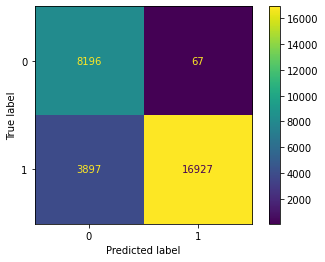

In [381]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_val_cat, y_val_cat_pred, labels=pipeline_rf.classes_), display_labels=pipeline_rf.classes_)
disp.plot()

In [382]:
train_auroc = roc_auc_score(y_train_cat, pipeline_rf.predict_proba(X_train)[:, 1])
print("AUROC score on train set: ", train_auroc)

val_auroc = roc_auc_score(y_val_cat, pipeline_rf.predict_proba(X_val)[:, 1])
print("AUROC score on validation set: ", val_auroc)

AUROC score on train set:  0.9999984423539362
AUROC score on validation set:  0.9771339399576606


**Part B:**


In [1]:
from sklearn.svm import SVC

In [6]:
svc = SVC(probability=True, max_iter = 2000)
pipeline_svc = Pipeline(steps=[
        ('columntransformer', cf),
        ('svc', svc)])
pipeline_svc.fit(X_train,y_train_cat)

NameError: ignored

In [7]:
y_val_cat_pred = pipeline_svc.predict(X_val)
print(classification_report(y_val_cat, y_val_cat_pred))

NameError: ignored

In [ ]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix(y_val_cat, y_val_cat_pred, labels=pipeline_svc.classes_), display_labels=pipeline_svc.classes_)
disp.plot()

In [ ]:
y_train_cat_pred = pipeline_svc.predict(X_train)
print(classification_report(y_train_cat, y_train_cat_pred))

In [ ]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix(y_train_cat, y_train_cat_pred, labels=pipeline_svc.classes_), display_labels=pipeline_svc.classes_)
disp.plot()

In [ ]:
rain_auroc = roc_auc_score(y_train_cat, pipeline_svc.predict_proba(X_train)[:, 1])
print("AUROC score on train set: ", train_auroc)

val_auroc = roc_auc_score(y_val_cat, pipeline_svc.predict_proba(X_val)[:, 1])
print("AUROC score on validation set: ", val_auroc)

**Part C**
* Fit a KNeighborsClassifier on the train dataset, using a new pipeline
* Print the classification report, plot the confusion matrix on the train set, print the AUROC on train and validation sets


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()
pipeline_knc = Pipeline(
    steps=[
        ('columntransformer', cf),
        ('kneighborsclassifier', knc)
    ]
)
pipeline_knc.fit(X_train,y_train_cat)

In [ ]:
y_val_cat_pred = pipeline_knc.predict(X_val)
print(classification_report(y_val_cat, y_val_cat_pred))

In [ ]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix(y_val_cat, y_val_cat_pred, labels=pipeline_knc.classes_), display_labels=pipeline_knc.classes_)
disp.plot()

In [ ]:
y_train_cat_pred = pipeline_knc.predict(X_train)
print(classification_report(y_train_cat, y_train_cat_pred))

In [ ]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix(y_train_cat, y_train_cat_pred, labels=pipeline_knc.classes_), display_labels=pipeline_knc.classes_)
disp.plot()

In [ ]:
train_auroc = roc_auc_score(y_train_cat, pipeline_knc.predict_proba(X_train)[:, 1])
print("AUROC score on train set: ", train_auroc)

val_auroc = roc_auc_score(y_val_cat, pipeline_knc.predict_proba(X_val)[:, 1])
print("AUROC score on validation set: ", val_auroc)


* Try to improve the results of the KNeighbors classifier model pipeline in Question 7C by tuning n_neighbors. Use GridSearchCV to identify the best estimator on the train dataset. The following hyperparameters must be checked, but feel free to change other parameters of the estimator as well. 

|Hyperparameter|Set of values|
|--------------|-------------|
|n_neighbors| {5, 10, 15}|
* Report the train and validation set AUROC metric for the best estimator identified i.e. AUROC
* Print the validation set classification report and confusion matrix display. 


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid_knc = {
    'kneighborsclassifier__n_neighbors': [5,10,15],
    'kneighborsclassifier__weights': ["uniform", "distance"]
}

grid_search_knc = GridSearchCV(
    pipeline_knc, param_grid_knc, cv=5, n_jobs=-1, return_train_score=True)
grid_search_knc.fit(X_train, y_train_cat)

print(grid_search_knc.best_score_)
print(grid_search_knc.best_params_)

In [ ]:
optimal_knc = grid_search_knc.best_estimator_
optimal_knc

In [ ]:
train_auroc = roc_auc_score(y_train_cat, optimal_knc.predict_proba(X_train)[:, 1])
print("AUROC score on train set: ", train_auroc)

val_auroc = roc_auc_score(y_val_cat,optimal_knc.predict_proba(X_val)[:, 1])
print("AUROC score on validation set: ", val_auroc)

In [ ]:
y_val_cat_pred = optimal_knc.predict(X_val)
print(classification_report(y_val_cat, y_val_cat_pred))

In [ ]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix(y_val_cat, y_val_cat_pred, labels=optimal_knc.classes_), display_labels=optimal_knc.classes_)
disp.plot()

In [ ]:
optimal_clf = optimal_knc

scores = cross_val_score(pipeline_knc, X_train, y_train_cat, scoring='roc_auc_ovr')
print("For the original estimator, score is:", scores.mean())

scores = cross_val_score(optimal_clf, X_train, y_train_cat, scoring='roc_auc_ovr')
print("For the optimal estimator, score is:", scores.mean())